# Bike Sharing Assignment

## Description
Boom Bikes is a bike-sharing system in which bikes are made available for shared use to individuals on a short term basis for a price or free. It allows people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system. Boom Bikes would like to predict the demand for shared bikes.

## Business Objective
The objective is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Technical Objective
To use Multiple Linear Regression to build a model to predict the key factors that affect the demand for bike rentals from the given dataset.
The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


## Steps Followed in Model Building

The major steps followed are:
1. Reading and Understanding the Data
2. Visualizing the Data
3. Data Preparation
4. Splitting the Data into Train and Test Sets
5. Building a Linear Model
6. Residual Analysis of the Trained Data (Assumption Evaluation)
7. Making Predictions Using the Final Model
8. Model Evaluation
9. Equation of the Best-Fit Model
10. Best-Fit Model Interpretation Based on the Equation

# Step 1. Reading and Understanding the Data

In [46]:
# Import necessary header files

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#Data manipulation libraries
import pandas as pd
import numpy as np

#Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data analysis and modeling libraries
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [47]:
#Load the dataset
bikesharing = pd.read_csv("day.csv")

#Check the head of the dataset to get data overview
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Overview
Inspect the various aspects of the bikesharing dataframe

In [48]:
bikesharing.shape

(730, 16)

The dataframe has `16 columns` and `730 rows` of data.

In [49]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- The dataframe has `no null values` that require clean-up.
- The datatype of the variables also look ok until now.

In [50]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- All the categorical variables have already been encoded as we can see 15 numeric variables above. 
- We need to check if the performed encoding is suitable or should it be changed.
- The maximum values across columns have a huge variation which tells us the need to pre-process the data with scaling.
- In addition we have one time-series data.
- Let's look at the data dictionary to understand the data now.

## Data Understanding
- instant : index for each record
- dteday : date of record capture
#### Independent Variables - Categorical Variables:

- season : season of the year 
    - (label encoded)
    - 1: spring
    - 2: summer
    - 3: fall
    - 4: winter
- yr : year of record capture 
    - (binary encoded)
    - 0: 2018
    - 1: 2019
- mnth : month of the year of record capture 
    - (label encoded)
    - values ranging from 1 to 12 (Jan - 1, Feb - 2...)
- holiday : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule) 
    - (binary encoded)
    - 1 - holiday
    - 0 - not a holiday
- weekday : day of the week
    - (label encoded)
- workingday : is it a working day
    - (binary encoded)
    - 1 - working day
    - 0 - holiday or weekend
- weathersit : weather situation
    - (label encoded)
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

#### Independent Variables - Numeric Variables:
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius. It takes into account factors like humidity, wind speed, and other environmental conditions that affect how the temperature actually feels to a person.
- hum: humidity
- windspeed: wind speed

#### Dependent Variables:
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

There is no way for us to know if the person coming in is a casual or a registered user. Therefore, these variables must not be used in model building. This leads to a phenomena called data leakage. 
Therefore, we will consider only `cnt` as the dependent variable.

## Data Cleanup

The following variables do not add any value to data analysis as per the above data understanding and therefore, will be dropped:
- instant - adds no business value
- dteday - we have variables like holiday and working day that will give us concrete insights for business decision making
- casual - will be accounted for in the dependent variable: cnt
- registered - will be accounted for in the dependent variable: cnt

In [51]:
#Drop columns that do not add business value to the data analysis
bikesharing = bikesharing.drop(["instant","dteday","casual","registered"], axis=1)
bikesharing.shape

(730, 12)

### Variables to be Considered for Cleanup after Analysis Through Visualization
From the definition of the variables, the following variables can be analyzed for multicollinearity in the next steps: 
- atemp vs temp, hum, windspeed
- mnth vs seasons
- holiday vs working day vs weekday

# Step 2: Visualizingthe  Data
Visualizing data helps us
- Identify if some predictors directly have a strong association with the outcome variable `cnt`.
- Verify if there is some obvious multicollinearity going on between pairs of variables.

## Visualizing Numeric Variables

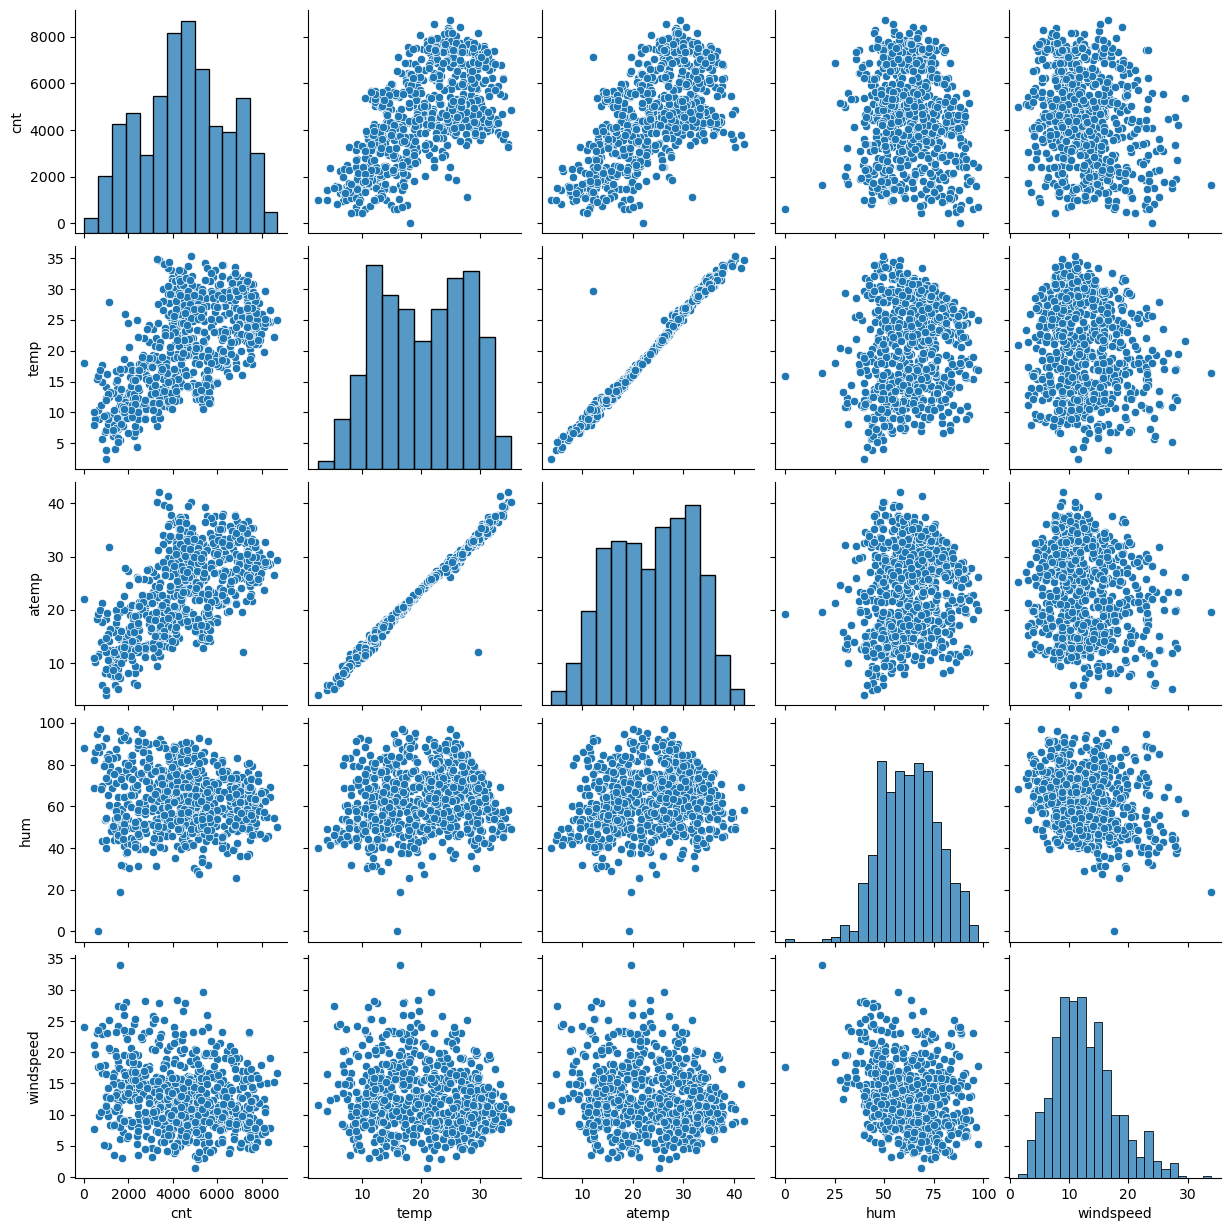

In [52]:
sns.pairplot(data=bikesharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Analysis: `temp` vs `atemp`

In [53]:
bikesharing['temp'].corr(bikesharing['cnt'])

0.6270440344135153

In [54]:
bikesharing['atemp'].corr(bikesharing['cnt'])

0.6306853489531041

- We can see temp and atemp having a linear relationship with cnt. This confirms that this is a linear regression problem.
- Temp and atemp have a very strong correlation between them as can be seen below. 

In [55]:
bikesharing['temp'].corr(bikesharing['atemp'])

0.991696178690565

We will choose to drop `atemp` because:
- By definition, atemp is a feel temperature feel - that is, without `temp`, `atemp` cannot exist.
- It is highly correlated with 'temp'. 

In [56]:
bikesharing = bikesharing.drop(['atemp'], axis=1)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


## Visualizing Categorical Variables

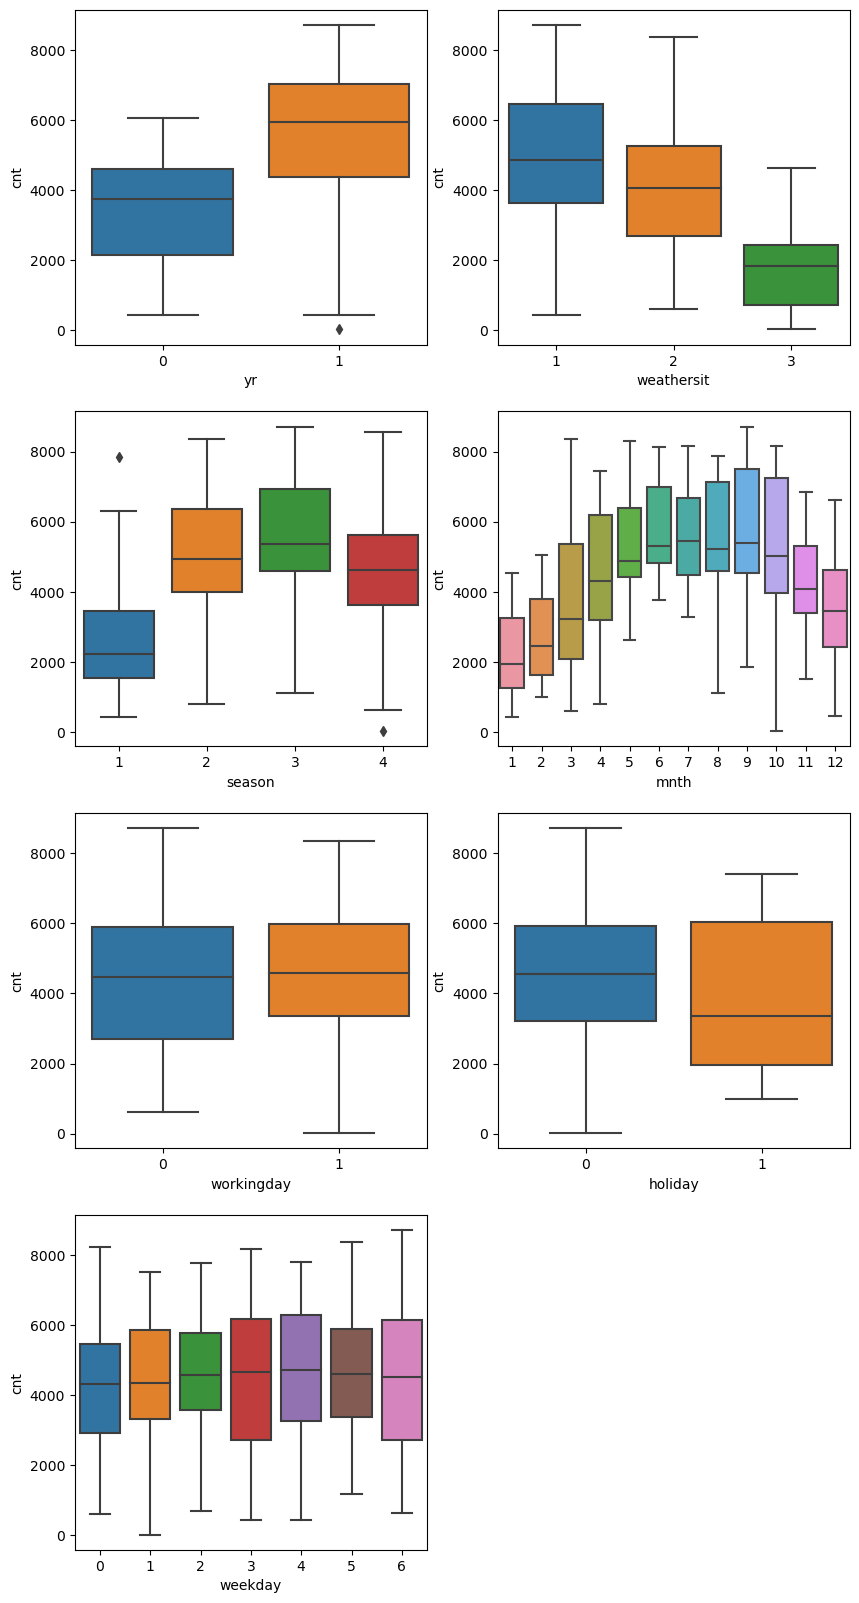

In [57]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.subplot(4,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.subplot(4,2,3)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(4,2,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(4,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.subplot(4,2,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.subplot(4,2,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.show()

### Analysis:

- `Year Vs Cnt`: We see an increase in the bike usage in the latest year. 
- `Weather situation Vs Cnt`: It is very clear that when the weather is clear, bike usage increases. During heavy rains, there is 0 usage of bikes.
- `Season Vs Cnt`: During summer and fall, there is an increase in the bike usage.
- `Mnth Vs Cnt:` Summer and fall months see an increase in the bike usage.
- `Workingday Vs Cnt:` The usage of bikes on a working day is high.
- `Holiday:` The usage of bikes on a non-holiday is high.
- `Season Vs Mnth`: We can see a high correlation in the way their values are being plotted across cnt.

### Season Vs Month

In [58]:
# Checking correlation between season and mnth
bikesharing['season'].corr(bikesharing['mnth'])

0.8310320517390505

### Holiday Vs Working Day Vs Weekday

- We know `holiday` is a subset of `workingday`. We will look at VIF values later to decide further.
- The attributes of `weekday` is covered in `holiday` and `workingday`. Therefore, `weekday` seems to be a redundant variable. However, we will also perform RFE, evaluate p-values and VIF to eliminate this variable later.

# Step 3: Data Preparation

## Seasons
- The variable `season` has four levels. 
- Since they do not have a numerical order or magnitude between them, we will replace the label encoding with `one-hot encoding`.

In [59]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_enc'
# Only n-1 variables required to represent this feature, therefore, drop the first dummy variable
# Rename dummy columns
# Drop original column
season_enc = pd.get_dummies(bikesharing['season'], drop_first = True)
bikesharing = pd.concat([bikesharing, season_enc], axis = 1)
season_map = {
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}
bikesharing.rename(columns=season_map, inplace=True)
bikesharing = bikesharing.drop(['season'], axis=1)
bikesharing.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,summer,fall,winter
0,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,0,0,0


Note that by performing one-hot encoding and dropping `spring`, `spring` is being considered as the reference feature based on which the coefficients for the other season features are to be interpreted once the model is built. Interpretation of the model in Step 10 gives us further insights into the role of reference feature.

## Weather Situation
- Since they do not have a numerical order or magnitude between them, we will replace the label encoding with `one-hot encoding`.

In [60]:
bikesharing.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

- The variable `weathersit` has four levels according to the dictionary, however while performing a value count, only three of the levels have data in the dataset. 
- Therefore, only three dummy variables(of which one will be dropped) will be created since level: `Heavy Rain` has no record in the dataset.

In [61]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_enc'
# Only n-1 variables required to represent this feature, therefore, drop the first dummy variable
# Rename dummy columns
# Drop original column
weathersit_enc = pd.get_dummies(bikesharing['weathersit'], drop_first=True)
bikesharing = pd.concat([bikesharing, weathersit_enc], axis = 1)
weathersit_map = {
    2 : 'mist',
    3 : 'light_snow'
}
bikesharing.rename(columns=weathersit_map, inplace=True)
bikesharing = bikesharing.drop(['weathersit'], axis=1)
bikesharing.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,mist,light_snow
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0


Note that by performing one-hot encoding and dropping `clear`, `clear` is being considered as the reference feature based on which the coefficients for the other weather features are to be interpreted once the model is built.

## Month
- The variable `mnth` has twelve levels. 
- Since they do not have a magnitudinal relation between them, we will replace the label encoding with `one-hot encoding`.

In [62]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_enc'
# Only n-1 variables required to represent this feature, therefore, drop the first dummy variable
# Rename dummy columns
# Drop original column
mnth_enc = pd.get_dummies(bikesharing['mnth'], drop_first=True)
bikesharing = pd.concat([bikesharing, mnth_enc], axis = 1)
mnth_map = {
    2 : 'feb',
    3 : 'mar',
    4 : 'apr',
    5 : 'may',
    6 : 'jun',
    7 : 'jul',
    8 : 'aug',
    9 : 'sep',
    10: 'oct',
    11: 'nov',
    12: 'dec'
}
bikesharing.rename(columns=mnth_map, inplace=True)
bikesharing = bikesharing.drop(['mnth'], axis=1)
bikesharing.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,summer,fall,...,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,0,6,0,14.110847,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


Note that by performing one-hot encoding and dropping `jan`, `jan` is being considered as the reference feature based on which the coefficients for the other motnhs are to be interpreted once the model is built.

## Weekday
- The variable `weekday` has seven levels. 
- Since, they do not have a magnitudinal relation between them, we will replace the label encoding with `one-hot encoding`.
- Before we encode, let's identify which days the labels 0-6 stand for. If workingday is 0, it is either a weekend or a public holiday. We expect weekends to have a higher count. Using this logic, we will try to derive which encoding stands for weekends.

In [63]:
# Get value count for working day with respect to weekday
bikesharing[['workingday','weekday']][bikesharing.workingday == 0].value_counts()

workingday  weekday
0           0          105
            6          105
            1           15
            4            2
            5            2
            2            1
            3            1
dtype: int64

We see that 0 and 6 have the highest value counts. Since days of the week are sequential, we can conclude the following:

- 0 - Sunday
- 6 - Saturday

Using this, we will now perform one-hot encoding.

In [64]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_enc'
# Only n-1 variables required to represent this feature, therefore, drop the first dummy variable
# Rename dummy columns
# Drop original column
weekday_enc = pd.get_dummies(bikesharing['weekday'], drop_first=True)
bikesharing = pd.concat([bikesharing, weekday_enc], axis = 1)
weekday_map = {
    1 : 'mon',
    2 : 'tue',
    3 : 'wed',
    4 : 'thu',
    5 : 'fri',
    6 : 'sat'
}
bikesharing.rename(columns=weekday_map, inplace=True)
bikesharing = bikesharing.drop(['weekday'], axis=1)
bikesharing.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,sep,oct,nov,dec,mon,tue,wed,thu,fri,sat
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Note that by performing one-hot encoding and dropping `sun`, `sun` is being considered as the reference feature based on which the coefficients for the other weekdays are to be interpreted once the model is built.

All the categorical variables are now properly encoded.


# Step 4: Splitting the Data into Train and Test Sets
The first step to regression is performing a test-train split.

In [65]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikesharing, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features

In [66]:
# Look at the numeric data
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,20.102429,63.112926,12.831318,4486.382353
std,7.431169,14.156632,5.291832,1952.158739
min,2.424346,0.000000,2.834381,22.000000
25%,13.606865,52.270825,9.041918,3120.000000
50%,20.209597,63.437500,12.083182,4530.000000
75%,26.615847,73.250025,15.750879,5973.500000
max,35.328347,97.041700,34.000021,8714.000000


We can see that the numeric variables are at different scales (min-max range).
If a model is built with variables on varying scales, variables that are widely spread will have smaller 𝛽 coefficients and the ones that have a narrow spread will have larger 𝛽 coefficients. This will falsely indicate the effect the predictors have on the dependent variable.

Therefore, rescaling them will help build a better model. We will use MinMax scaling.
We will rescale only the `training set` first for building the model.

In [67]:
scaler = MinMaxScaler()

# Apply scaler() to all the numeric columns
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620
std,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.540519,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


Now, we see that all numeric variables are equally scaled with min at 0 and max at 1.
We have chosen min-max scaling since we have many categorical variables which are also encoded using 0s and 1s.
## Checking the correlation coefficients to see which variables are highly correlated

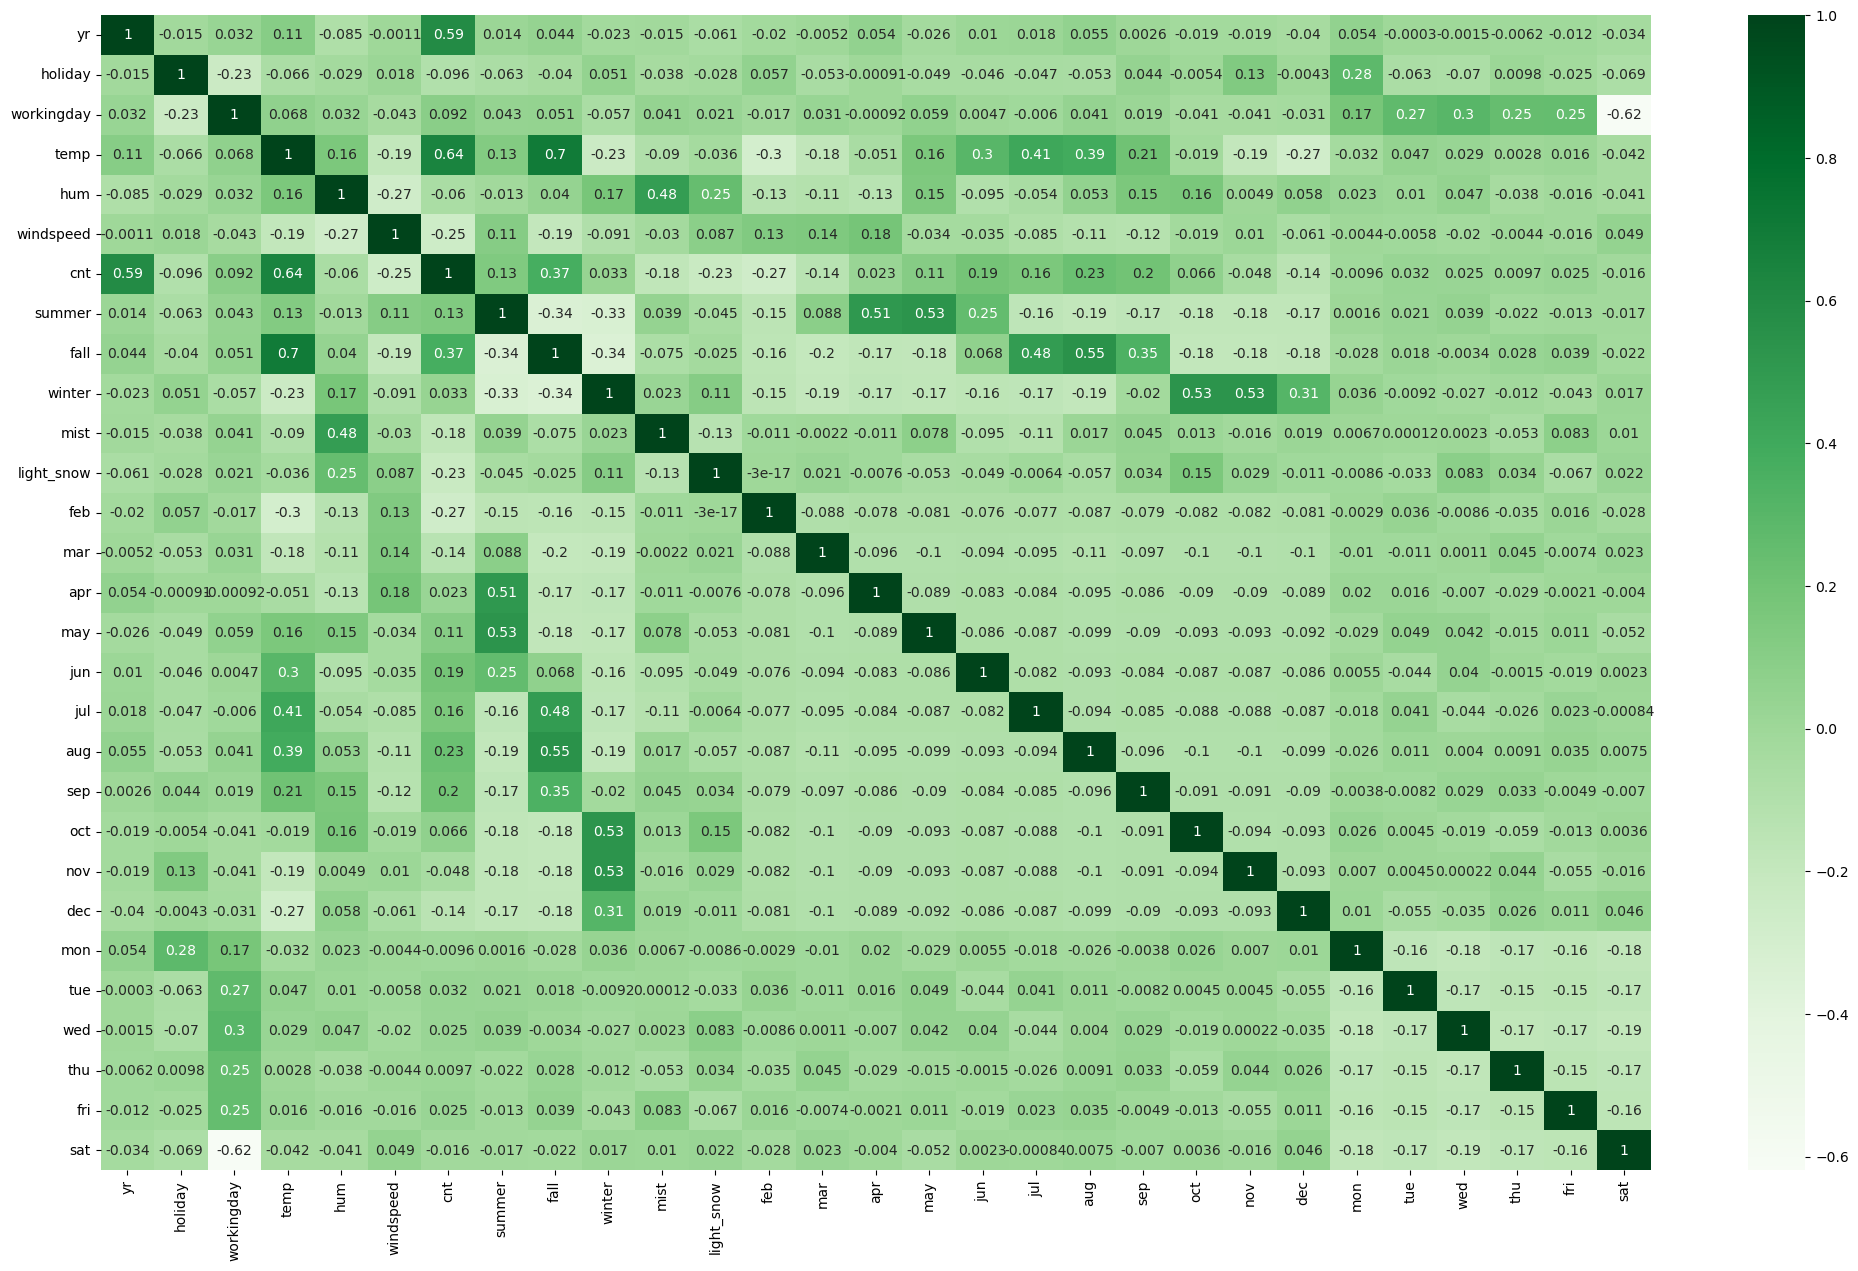

In [68]:
plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="Greens")
plt.show()

### Analysis:
- We see that `temp` is the most highly correlated with `cnt`.
- It is also interesting to note multicollinearity going on between various predictor variables.
    - temp vs fall
    - seasons with their corresponding months
    - days of the week with working day
- We will depend on `RFE` for feature selection and `VIF` to minimize multicollinearity while building the model. The decision to drop these variables can be based on that instead of manually dropping them now

## Dividing into X and Y Sets for Model Building

In [69]:
y_train = df_train.pop('cnt')
X_train = df_train

# Step 5: Building a Linear Model
## Recursive Feature Elimination(RFE) for Feature Selection
RFE is an automated feature selection technique used to identify and select the most important features from a dataset. It is often used as a preprocessing step to reduce the dimensionality of data before applying a linear regression model.
With the business-domain knowledge that we have and the analysis obtained from the various visulaizations in Step 2, we will validate if the features chosen by RFE can be considered before proceeding with our model building.

### Check number of columns in the dataset

In [70]:
X_train.shape

(510, 28)

We have 28 columns, we will initially build a reasonable model using RFE selecting 11 variables

In [71]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=11)     
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 5),
 ('winter', True, 1),
 ('mist', True, 1),
 ('light_snow', True, 1),
 ('feb', False, 10),
 ('mar', False, 6),
 ('apr', False, 8),
 ('may', False, 7),
 ('jun', False, 9),
 ('jul', False, 11),
 ('aug', True, 1),
 ('sep', True, 1),
 ('oct', False, 4),
 ('nov', False, 12),
 ('dec', False, 13),
 ('mon', False, 14),
 ('tue', False, 15),
 ('wed', False, 17),
 ('thu', False, 18),
 ('fri', False, 16),
 ('sat', False, 2)]

### Columns Chosen through RFE

In [72]:
# Columns chosen through RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'mist',
       'light_snow', 'aug', 'sep'],
      dtype='object')

- yr
- holiday - working day and day of the week can be determined from here
- temp
- hum
- windspeed
- summer - season
- winter - season
- mist - weather situation
- light snow - weather situation
- aug - month
- sept - month

### Analysis
- We can see how the variables picked are minimizing multicollinearity when compared with the heatmap above.
- For example, `Months: aug, sept` have been included which belong to `season: fall`. From the heatmap, we saw that `fall` and `temp` were multicollinear. That relationship will not be present in the model. However, since bike usage was maximum in `fall` (from the box plot), including months `aug` and `sept` makes logical sense.
- Another example we see if how all the weekdays have been eliminated while `holiday` is selected.
- The variables suggested by RFE look reasonable and therefore, we will include all the variables suggested by RFE while building our model next.

### Columns eliminated by RFE

In [73]:
# Columns eliminated by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'fall', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'oct',
       'nov', 'dec', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat'],
      dtype='object')

The order in which they have been elimnated is as shown below:
This is important to keep in mind so that should we have the need to replace any of the RFE chosen variables with the ones elimnated, this is the order we can follow.
- sat
- workingday
- oct
- fall
- mar
- may
- apr
- jun
- feb
- jul
- nov
- dec
- mon
- tue
- fri
- wed
- thu

## Building model using statsmodel, for the detailed statistics
While building a model, two things to keep in mind for checking the significance of the features:
- p-value: This value determines the significance of a variable. Any variable with p-value > 0.05 will be eliminated.
- VIF : This value determines how various features are correlated with each other. Any variable with VIF > 5 will definitely be dropped, 2<VIF<5 - has to be evaluated with caution.

### Building lm_1 with all the variables chosen by RFE

In [74]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train = X_train[col]

#Adding constant
X_train_sm = sm.add_constant(X_train)

#Build model
lm_1 = sm.OLS(y_train, X_train_sm).fit()

#Get summary
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.1
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          4.43e-191
Time:                        14:32:22   Log-Likelihood:                 508.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     498   BIC:                            -941.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2317      0.027      8.607      0.000       0.179       0.285
yr             0.2286      0.008     28.154      0.000       0.213       0.245
holiday       -0.0958      0.026     -3.741      0.000      -0.146      -0.045
temp           0.5395      0.022     24.503      0.000       0.496       0.583
hum           -0.1759      0.037     -4.694      0.000      -0.250      -0.102
windspeed     -0.1835      0.026     -7.151      0.000      -0.234      -0.133
summer         0.1030      0.011      9.441      0.000       0.082       0.124
winter         0.1482      0.011     13.942      0.000       0.127       0.169
mist          -0.0544      0.011     -5.167      0.000      -0.075      -0.034
light_snow    -0.2351      0.026     -8.932      0.000      -0.287      -0.183
aug            0.0553      0.016      3.393      0.001       0.023       0.087
sep            0.1222      0.016      7.542      0.000       0.090       0.154
==============================================================================
Omnibus:                       56.424   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.275
Skew:                          -0.608   Prob(JB):                     6.26e-28
Kurtosis:                       5.101   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Analysis:
#### R-squared value of lm_1 = 0.841
- The R-squared value suggests that ~84% of the variance in the dependent variable `cnt` can be explained by the predictor variables.
- `Adjusted r-squared of 0.838` suggests that the model is not only fitting the data well but is also not overly complex. It implies that the chosen predictors are providing substantial information about the dependent variable.
- This looks like a pretty good model with a `r-squared = 0.841`.
- p-values are within the range of 0.05, i.e., all the predictors chosen are significant. 
- Now, let us look at VIF to check for multicollinearity.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.33
2,temp,9.66
4,windspeed,3.58
7,mist,2.13
0,yr,2.01
5,summer,1.82
6,winter,1.75
9,aug,1.59
10,sep,1.31
8,light_snow,1.16


### Analysis:
- We see that `hum` has VIF > 10 which suggests a high degree of multicollinearity between `hum` and the other independent variables in lm_1.
- We will remove `hum` and rebuild the model.

## Building lm_2 after dropping `hum`

In [76]:
X_train = X_train.drop(['hum'], axis=1)
X_train_sm = sm.add_constant(X_train)
lm_2 = sm.OLS(y_train, X_train_sm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.26e-187
Time:                        14:32:24   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1312      0.017      7.871      0.000       0.098       0.164
yr             0.2325      0.008     28.202      0.000       0.216       0.249
holiday       -0.0971      0.026     -3.715      0.000      -0.148      -0.046
temp           0.5174      0.022     23.564      0.000       0.474       0.560
windspeed     -0.1497      0.025     -5.956      0.000      -0.199      -0.100
summer         0.1000      0.011      8.995      0.000       0.078       0.122
winter         0.1383      0.011     13.003      0.000       0.117       0.159
mist          -0.0825      0.009     -9.354      0.000      -0.100      -0.065
light_snow    -0.2828      0.025    -11.411      0.000      -0.332      -0.234
aug            0.0542      0.017      3.253      0.001       0.021       0.087
sep            0.1162      0.016      7.045      0.000       0.084       0.149
==============================================================================
Omnibus:                       55.419   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.468
Skew:                          -0.605   Prob(JB):                     6.93e-27
Kurtosis:                       5.050   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Analysis:
#### R-squared of lm_2 = 0.834
- Although the `r-squared` value has dropped to 0.834 which is still a very minor drop, we know that we have minimized multicollinearity significantly which is good for the model. The adjusted r-squared is also closer to r-squared.
- Let's further analyze VIF of the independent variables in lm_2 now.

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,summer,1.81
8,aug,1.58
5,winter,1.49
6,mist,1.48
9,sep,1.31
7,light_snow,1.08
1,holiday,1.04


### Analysis:
- Although this is a good model, we want to make sure all the predictors have their VIF less than 5.
- We see that `temp` has a VIF of 5.01. 
- Let's see what happens if we drop `temp`.

## Dropping `temp` to see its effect on the model:
- We see `temp` having a VIF just below 5. 
- But we also know that `temp` is a very important variable because of the following reasons:
    - From the pair plots, we decided that this usecase would be a linear model based on the scatter plot of `temp vs cnt`.  
    - From the correlation matrix(heatmap), we know that `temp` was the highest correlated variable with `cnt`.
    - From a business perspective also, `temp` is a very important variable because it is one value that will be available for all data consistently. 
- Therefore, we will have to carefully evaluate if `temp` can be dropped. Let us check what happens if we drop this variable using a temporary model.

In [78]:
X_train_temp = X_train.drop(['temp'], axis=1)
X_train_temp = sm.add_constant(X_train_temp)
lm_temp = sm.OLS(y_train, X_train_temp).fit()
lm_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          5.01e-108
Time:                        14:32:26   Log-Likelihood:                 306.23
No. Observations:                 510   AIC:                            -592.5
Df Residuals:                     500   BIC:                            -550.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4058      0.017     23.433      0.000       0.372       0.440
yr             0.2501      0.012     20.981      0.000       0.227       0.274
holiday       -0.1251      0.038     -3.300      0.001      -0.200      -0.051
windspeed     -0.2480      0.036     -6.887      0.000      -0.319      -0.177
summer         0.1662      0.016     10.643      0.000       0.136       0.197
winter         0.1182      0.015      7.678      0.000       0.088       0.148
mist          -0.1126      0.013     -8.881      0.000      -0.138      -0.088
light_snow    -0.2837      0.036     -7.882      0.000      -0.354      -0.213
aug            0.2227      0.022     10.201      0.000       0.180       0.266
sep            0.2354      0.023     10.327      0.000       0.191       0.280
==============================================================================
Omnibus:                        1.043   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                0.851
Skew:                           0.039   Prob(JB):                        0.654
Kurtosis:                       3.185   Cond. No.                         8.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Analysis:
#### R-squared of lm_temp = 0.650
- We can see that r-squared has dropped significantly to 0.65 which confirms that `temp` is a very important variable and must not be dropped.
- Therefore, let us drop the next variable `windspeed` with the highest VIF and see it's effect on the model, especially on the VIF value of `temp`.

### Building lm_3 after dropping `windspeed`

In [79]:
X_train = X_train.drop(['windspeed'], axis=1)
X_train_sm = sm.add_constant(X_train)
lm_3 = sm.OLS(y_train, X_train_sm).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.99e-181
Time:                        14:32:27   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0703      0.014      5.164      0.000       0.044       0.097
yr             0.2313      0.009     27.142      0.000       0.215       0.248
holiday       -0.1002      0.027     -3.707      0.000      -0.153      -0.047
temp           0.5390      0.022     24.080      0.000       0.495       0.583
summer         0.0956      0.011      8.336      0.000       0.073       0.118
winter         0.1462      0.011     13.389      0.000       0.125       0.168
mist          -0.0809      0.009     -8.875      0.000      -0.099      -0.063
light_snow    -0.2974      0.026    -11.660      0.000      -0.347      -0.247
aug            0.0585      0.017      3.399      0.001       0.025       0.092
sep            0.1236      0.017      7.270      0.000       0.090       0.157
==============================================================================
Omnibus:                       62.948   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.343
Skew:                          -0.658   Prob(JB):                     1.67e-32
Kurtosis:                       5.270   Cond. No.                         9.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.92
0,yr,1.94
3,summer,1.78
7,aug,1.56
4,winter,1.47
5,mist,1.44
8,sep,1.29
6,light_snow,1.06
1,holiday,1.03


### Analysis:
#### R-squared of lm_3 = 0.823

- Although the r-squared value has dropped slightly which is expected, the significance of all the predictors(p=values) is good.
- The VIF of all the predictors is also within 5 which is acceptable for our usecase.
- Let us finalize lm_3 as our final model and proceed with model analysis.
- The final list of predictor variables on which this model is built are:
    - temp
    - yr
    - summer
    - aug
    - winter
    - mist
    - sep
    - light_snow
    - holiday
    
#### Our final model has a R-squared value of 0.823 and an adjusted R-squared value of 0.819.
    
# Step 6: Residual Analysis of the Trained Data
## Calculate residuals (error terms)

In [81]:
#Predict the dependent variable for the training set from the built model.
y_train_pred = lm_3.predict(X_train_sm)

# Get the residual error
res = y_train - y_train_pred
res.head()

653    0.141714
576    0.086723
426    0.006191
728   -0.229550
482   -0.046482
dtype: float64

## Validating Assumptions of Linear Regression
### Assumption 1: Residuals are normally distributed with mean almost equal to 0
One of the assumptions of a linear regression model is that the error terms are normally distributed with mean almost equal to 0. Let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

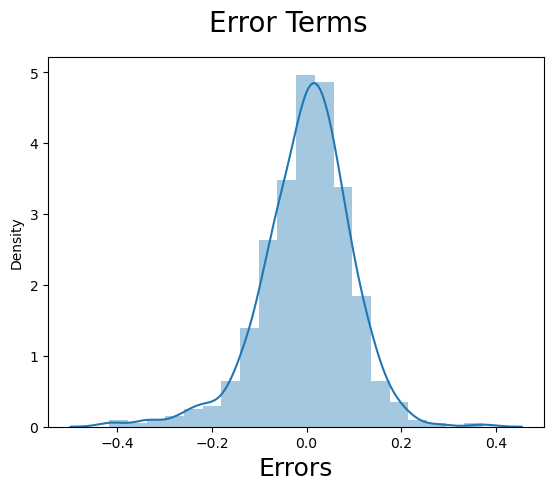

In [82]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)   

We can see that the residual errors are normally distributed with mean closer to zero.
### Assumption 2: The residuals are not dependent on each other

That is, increase in the value of a residual must not affect another residual value.

Text(0, 0.5, 'y_train_pred')

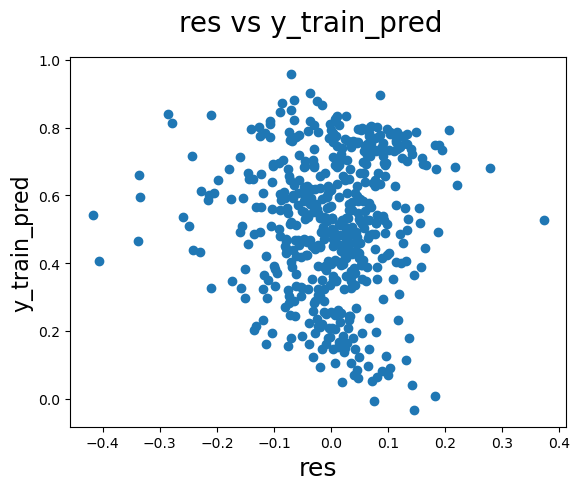

In [83]:
# Plotting res and y_train_pred to understand the dependency
fig = plt.figure()
plt.scatter(res, y_train_pred)
fig.suptitle('res vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('res', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16)

### Assumption 3: The residuals are homoscedastic

This means that the model's errors (residuals) don't change in a systematic way as we make predictions across a range of values. That is, whether I'm trying to predict the bike demands when the temperture is very high or very low, errors in predictions must roughly be the same. This property is important for the reliability of regression models, as it ensures that the model's performance is consistent across different parts of the data.

This can be verified from the above two plots as well. But let's plot a QQ plot and observe too. The residuals should roughly follow a straight line in the QQ plot.

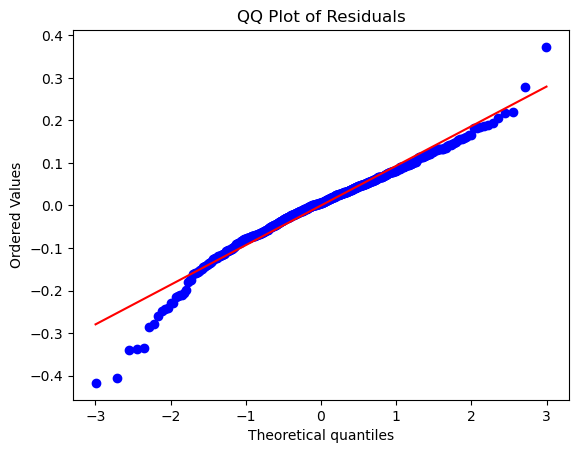

In [84]:
from scipy import stats
stats.probplot(res, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

# Step 7: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

## Apply scaling on the test set

In [85]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test[num_vars].describe()

,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.638508,0.313350,0.520592
std,0.233698,0.148974,0.159947,0.218435
min,0.046591,0.261915,-0.042808,0.048205
25%,0.354650,0.527265,0.198517,0.377531
50%,0.558691,0.627737,0.299459,0.524275
75%,0.759096,0.743928,0.403048,0.672745
max,0.984424,1.002146,0.807474,0.963300


## Dividing Test Set into X_test and y_test

In [86]:
y_test = df_test.pop('cnt')
X_test = df_test

## Drop variables that are not part of the model

In [87]:
# Eliminate columns eliminated by RFE
X_test = X_test[col]

# Eliminate columsn that were manually eliminated during model building
X_test = X_test.drop(['hum'], axis = 1)
X_test = X_test.drop(['windspeed'], axis = 1)

## Make predictions

In [88]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lm_3.predict(X_test_sm)
y_test_pred.head()

184    0.337521
535    0.882970
299    0.411456
221    0.603950
152    0.606370
dtype: float64

# Step 8: Model Evaluation

In [89]:
## Check R-squared value
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
print("r-squared on test set:", round(r2,2))
print("mean squared error on test set:", round(mse,2))

r-squared on test set: 0.8
mean squared error on test set: 0.01


## Comparing R-squared values
- R-squared value on the test set is ~0.80
- R-squared value on the training set is ~0.82
The r-squared value of both the sets are close to each other - so it is a good model.


## Actual Vs Predicted values for `cnt`
Let's now plot the graph for actual versus predicted values for dependent variable `cnt`.

Text(0, 0.5, 'y_test_pred')

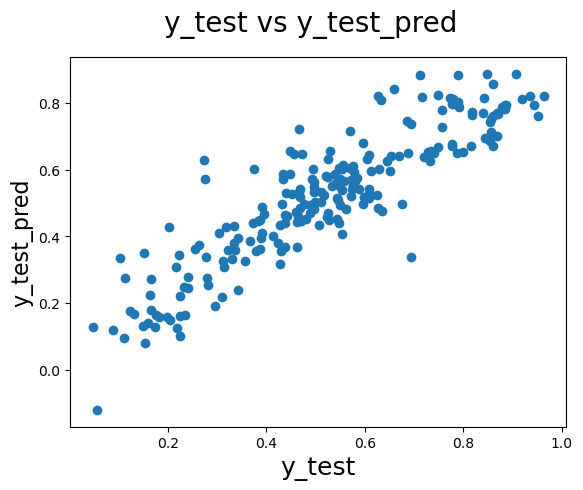

In [90]:
# Plotting y_test and y_test_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)    

### Analysis:
- One of the assumptions of linear regression model is that the variance of error terms is constant. 
- We can see that the variance of error terms is constant since the y_test vs y_test_pred plot is a linear line.
- The error terms are homoscedastic as can be seen in the plot, therefore, inferences made on the model will be realistic.

# Step 9: Equation of the Best-Fit Model  
From lm_3, we can see that the equation of our best fitted line is:
$$ cnt = 0.070264 + 0.539040 \times temp - 0.297362 \times lightsnow + 0.231263 \times yr + 0.146153 \times winter + 0.123609 \times sep - 0.100177 \times holiday + 0.095578 \times summer - 0.080930 \times mist + 0.058455 \times aug $$

# Step 10: Best-Fit Model Interpretation based on the Equation
We will now interpret our model based on the coefficients derived for the predictor variables.
- `const`: This is the intercept of the model. When all predictor variables are zero, the predicted value of `cnt` is expected to increase by approximately 0.070264.
- `temp`: This is the most significant coefficient in the model, indicating a strong positive relationship with `cnt`. For every unit increase in temperature, the predicted value of the dependent variable is expected to increase by approximately 0.539040 units, holding all other variables constant.
- `light_snow` - This is the second most significant coefficient in the model, indicating a negative relationship with `cnt`. We know that light_snow is a one-hot encoded predictor derived out of the categorical variable `weathersit` keeping `clear` as the reference variable. Here, it means that when the weather situation is `light snow`, the predicted value of `cnt` is expected to decrease by approximately 0.297362 units compared to when the weather situation is `clear`, holding all other variables in the equation constant.

Likewise, every other variable can be interpreted in the above equation

## Addressing the Business Problem
### Which variables are significant in predicting the demand for shared bikes
The magnitude of the coefficients(not the sign) along with their p-values determine the significance of these predictors. The top variables have p-value = 0 indicating that they are all significant.
Therefore, we rank significance based on magnitude of coefficients. The top five variables that are significant in predicting the demand for shared bikes are:
1. Temperature
2. Weather situation (light snow)
3. Year
4. Season (Winter)
5. month (September)

### How well those variables describe the bike demands
We will now interpret our model based on the coefficients derived for the predictor variables in order to understand how well those variables describe the bike demands.
The dependent variable `cnt` determines the bike demands. 
1. `temp` - For every unit increase in temperature, the bike demands is expected to increase by approximately 0.539040 units (holding all other variables constant).
2. `light_snow` - During the weather situation of light snow, the bike demands is expected to decrease by approximately 0.297362 units compared to when the weather situation is clear (holding all other variables in the equation constant).
3. `yr` - Since these bike-sharing systems are gaining popularity (business-domain knowledge), the demand for these bikes is increasing every year by approximately 0.231263 units (holding all other variables constant).  
4. `winter` - During winter, the bike demand is expected to increase by approximately 0.146153 units compared to when it is `spring` (holding all other variables in the equation constant).
5. `sep` - During September, the demand for these bikes is expected to increase by approximately 0.123609 units compared to the month of January (holding all other variables in the equation constant).

### Recommendation
Based on the predictors with positive coefficients, the company can choose to capitalize on them and provide amenities and offers for days that are impacted by negative coefficients.
